# Onnx Models for Image Classification

## Load an Image

Read the pixels, show the type, tensor shape, and the image itself (represented as tensor).

u1[*,*,*]?
(565, 563, 4)



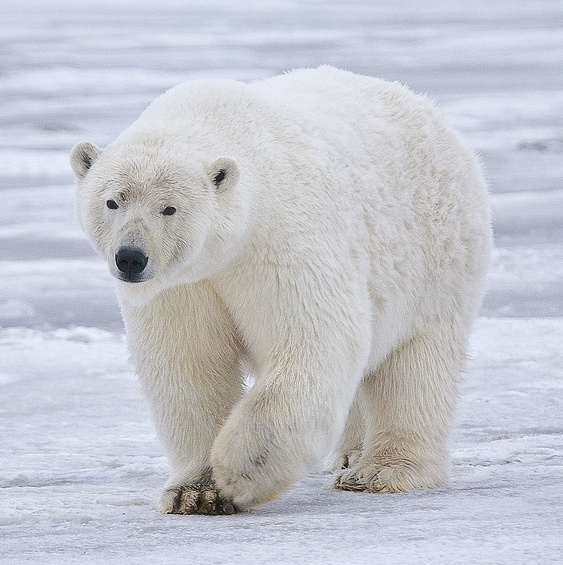

In [1]:
image := "https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg"
    ->ReadPixels();
image->GetType();
image.Shape;
image;

## EfficientNet

Score with `EfficientNet`, show:
* The type of `scores`.
* The shape of `scores` (since it is a tensor).
* The min, max, and count of values in `scores`.
* The first 7 scores.
* The sum of the scores.

In [2]:
scores := image->EfficientNet();

scores->GetType();
scores.Shape;
scores.Values->MinMaxC();
scores[:7];
scores.Values->Sum();

r4[*]?
(1000,)
{ Count: 1000, Max: 0.9999237, Min: 7.58719E-10 }
Ten<r4>(7) [7.810111E-09, 2.0949832E-08, 3.3091307E-08, 9.922953E-09, 3.507848E-08, 6.653121E-08, 3.0262214E-08]
1.0000014360187806


From the stats and the sum, it looks like the scores are normalized to be non-negative and sum to 1 (to look like probabilities).

### Get Labels

To get the labels, invoke `EfficientNet` with no arguments. Then show:
* The type of `labels`.
* The shape of labels (since it is a tensor).
* The first 7 labels.

In [3]:
labels := EfficientNet();

labels->GetType();
labels.Shape;
labels[:7];

s[*]
(1000,)
Ten<str>(7) [tench, goldfish, great white shark, tiger shark, hammerhead shark, electric ray, stingray]


### Combine Scores and Labels

Define UDFs for convenience.

In [4]:
func Top(scores, labels, n) :=
    scores.Values
    ->ForEach(as Score, labels.Values as Label, { Score, Label })
    ->Sort(Score)
    ->Take(n);

func Top(scores, labels) := Top(scores, labels, 5);

func Top(scores) := Top(scores, EfficientNet());

In [5]:
scores->Top()

Seq<{str,r4}>
   0) { Label: polar bear, Score: 0.9999237 }
   1) { Label: brown bear, Score: 3.223515E-05 }
   2) { Label: American black bear, Score: 5.328627E-06 }
   3) { Label: giant panda, Score: 2.6074206E-06 }
   4) { Label: Alaskan tundra wolf, Score: 1.5727704E-06 }


## ResNet 50 v2

Do the same as above with another image-net model, namely `ResNet`.

In [6]:
scores := ResNet(image);

scores->GetType();
scores.Shape;
scores.Values->MinMaxC();
scores[:7];

r4[*]?
(1000,)
{ Count: 1000, Max: 21.138582, Min: -5.47119 }
Ten<r4>(7) [0.66144705, 0.99778026, 2.2222662, -0.086257145, 1.0926985, 0.33703357, -1.043496]


### Apply SoftMax

Unlike with `EfficientNet`, the scores are not normalized. Apply `SoftMax` to address this.

In [7]:
scores := ResNet(image)->SoftMax();

scores.Shape;
scores.Values->MinMaxC();
scores[:7];
scores.Values->Sum();

(1000,)
{ Count: 1000, Max: 0.9998537, Min: 2.7762556E-12 }
Ten<r4>(7) [1.2788801E-09, 1.7901818E-09, 6.0909406E-09, 6.0548794E-10, 1.96843E-09, 9.245682E-10, 2.3247843E-10]
0.9999999780995471


### Same Labels?

Do the two models use the same labels?

In [8]:
labels2 := ResNet();
labels2.Shape;
labels2[:7];

(1000,)
Ten<str>(7) [tench, goldfish, great white shark, tiger shark, hammerhead shark, electric ray, stingray]


In [9]:
same := labels = labels2;
same->GetType();

b[*]


In [10]:
same.Shape;
same.Values->All();

(1000,)
true


### Combine Scores and Labels

In [11]:
scores->Top()

Seq<{str,r4}>
   0) { Label: polar bear, Score: 0.9998537 }
   1) { Label: brown bear, Score: 0.00013086095 }
   2) { Label: Alaskan tundra wolf, Score: 5.0482463E-06 }
   3) { Label: American black bear, Score: 2.1848682E-06 }
   4) { Label: Samoyed, Score: 1.4639849E-06 }


# How about just bear fur?

(200, 200, 4)



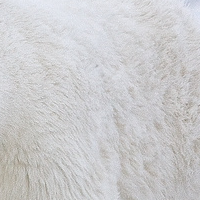

In [12]:
fur := image[100:300, 250:450];
fur.Shape;
fur;

In [13]:
fur->EfficientNet()->Top();
fur->ResNet()->SoftMax()->Top();

Seq<{str,r4}>
   0) { Label: polar bear, Score: 0.9992361 }
   1) { Label: ram, Score: 0.00032074965 }
   2) { Label: giant panda, Score: 0.00013882467 }
   3) { Label: Kuvasz, Score: 0.00011637706 }
   4) { Label: Alaskan tundra wolf, Score: 2.9188952E-05 }
Seq<{str,r4}>
   0) { Label: polar bear, Score: 0.7141452 }
   1) { Label: ram, Score: 0.20500661 }
   2) { Label: Arctic fox, Score: 0.021310475 }
   3) { Label: Kuvasz, Score: 0.013770156 }
   4) { Label: Samoyed, Score: 0.010252061 }


# Multiple Images

Includes the bear face saved in the `ImagesAsTensors` notebook.

In [14]:
files := [
    "https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg",
    "polar_bear_face.png",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Jelly_cc11.jpg/800px-Jelly_cc11.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/b/bd/Golden_Retriever_Dukedestiny01_drvd.jpg",
    "https://i2.pickpik.com/photos/395/172/1018/cat-tabby-outdoors-animals-preview.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg",
];
images := files->ReadPixels();

In [15]:
images.Shape;

Seq<(i8,i8,i8)>
   0) (565, 563, 4)
   1) (200, 190, 4)
   2) (532, 800, 4)
   3) (515, 652, 4)
   4) (728, 728, 4)
   5) (2212, 2225, 4)


### Show the images


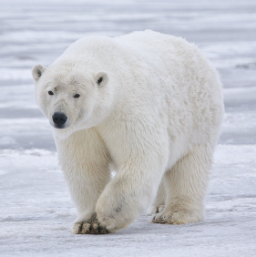


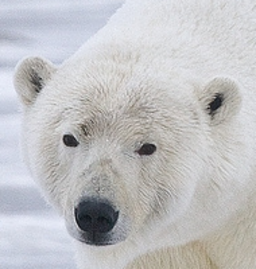


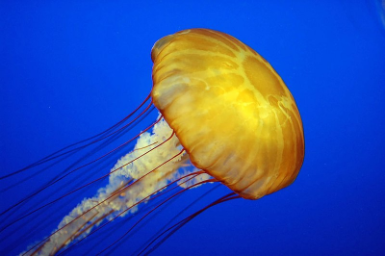


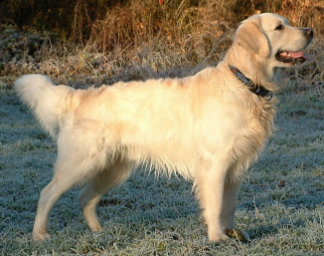


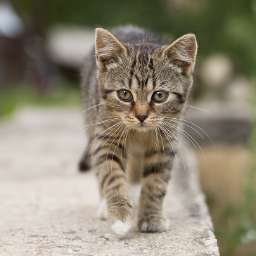


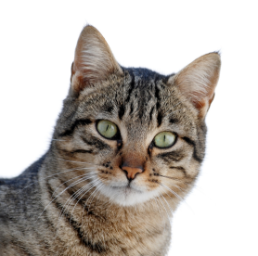

In [16]:
func Show(img) := img->ResizePixels(256);

images->Show();

### Score with both models

In [17]:
results := ForEach(file: files, img: images,
    { file, top_eff: img->EfficientNet()->Top(), top_res: img->ResNet()->SoftMax()->Top() });
results;

Seq<{str,Seq<{str,r4}>,Seq<{str,r4}>}>
   0) { file: https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg, 
        top_eff: Seq<{str,r4}>
             0) { Label: polar bear, Score: 0.9999237 }
             1) { Label: brown bear, Score: 3.223515E-05 }
             2) { Label: American black bear, Score: 5.328627E-06 }
             3) { Label: giant panda, Score: 2.6074206E-06 }
             4) { Label: Alaskan tundra wolf, Score: 1.5727704E-06 }
        top_res: Seq<{str,r4}>
             0) { Label: polar bear, Score: 0.9998537 }
             1) { Label: brown bear, Score: 0.00013086095 }
             2) { Label: Alaskan tundra wolf, Score: 5.0482463E-06 }
             3) { Label: American black bear, Score: 2.1848682E-06 }
             4) { Label: Samoyed, Score: 1.4639849E-06 }
      }
   1) { file: polar_bear_face.png, 
        top_eff: Seq<{str,r4}>
             0) { Label: polar bear, Score: 0.99994767 }
             1) { Label: Alaskan tund

### Show the images with corresponding results.

To see a tensor as an image in notebooks, the tensor needs to be its own top level expression. This could be fixed with better value display functionality
in the kernel. Until that is added, to see the images paired with results do a `while` loop. Eventually we'll add a `foreach` statement.


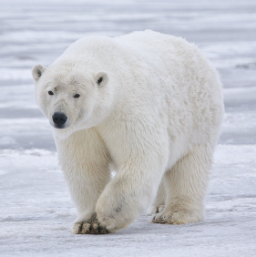

{ file: https://upload.wikimedia.org/wikipedia/commons/6/66/Polar_Bear_-_Alaska_%28cropped%29.jpg, 
  top_eff: Seq<{str,r4}>
       0) { Label: polar bear, Score: 0.9999237 }
       1) { Label: brown bear, Score: 3.223515E-05 }
       2) { Label: American black bear, Score: 5.328627E-06 }
       3) { Label: giant panda, Score: 2.6074206E-06 }
       4) { Label: Alaskan tundra wolf, Score: 1.5727704E-06 }
  top_res: Seq<{str,r4}>
       0) { Label: polar bear, Score: 0.9998537 }
       1) { Label: brown bear, Score: 0.00013086095 }
       2) { Label: Alaskan tundra wolf, Score: 5.0482463E-06 }
       3) { Label: American black bear, Score: 2.1848682E-06 }
       4) { Label: Samoyed, Score: 1.4639849E-06 }
}



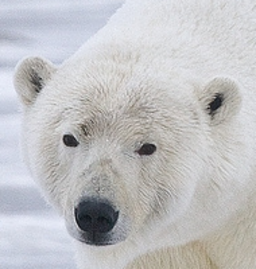

{ file: polar_bear_face.png, 
  top_eff: Seq<{str,r4}>
       0) { Label: polar bear, Score: 0.99994767 }
       1) { Label: Alaskan tundra wolf, Score: 1.3220654E-05 }
       2) { Label: brown bear, Score: 5.7596753E-06 }
       3) { Label: Samoyed, Score: 3.1906386E-06 }
       4) { Label: giant panda, Score: 2.9778676E-06 }
  top_res: Seq<{str,r4}>
       0) { Label: polar bear, Score: 0.9987335 }
       1) { Label: brown bear, Score: 0.0009181965 }
       2) { Label: Alaskan tundra wolf, Score: 0.00022414268 }
       3) { Label: teddy bear, Score: 1.6173233E-05 }
       4) { Label: American black bear, Score: 1.5940797E-05 }
}



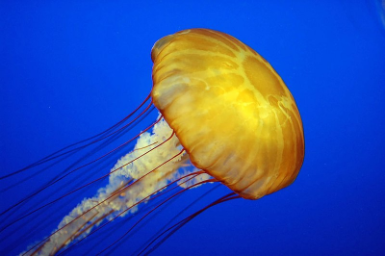

{ file: https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Jelly_cc11.jpg/800px-Jelly_cc11.jpg, 
  top_eff: Seq<{str,r4}>
       0) { Label: jellyfish, Score: 0.99997497 }
       1) { Label: hoop skirt, Score: 6.7519613E-07 }
       2) { Label: electric ray, Score: 6.413433E-07 }
       3) { Label: chambered nautilus, Score: 3.913639E-07 }
       4) { Label: mushroom, Score: 2.839819E-07 }
  top_res: Seq<{str,r4}>
       0) { Label: jellyfish, Score: 0.985466 }
       1) { Label: chambered nautilus, Score: 0.006958732 }
       2) { Label: conch, Score: 0.0010346882 }
       3) { Label: sea anemone, Score: 0.0006705495 }
       4) { Label: goldfish, Score: 0.00048813954 }
}



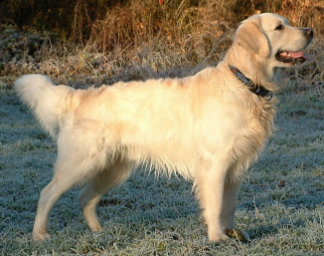

{ file: https://upload.wikimedia.org/wikipedia/commons/b/bd/Golden_Retriever_Dukedestiny01_drvd.jpg, 
  top_eff: Seq<{str,r4}>
       0) { Label: Golden Retriever, Score: 0.96155435 }
       1) { Label: English Setter, Score: 0.032241885 }
       2) { Label: Labrador Retriever, Score: 0.0032600965 }
       3) { Label: Kuvasz, Score: 0.0014736761 }
       4) { Label: Brittany, Score: 0.0003837153 }
  top_res: Seq<{str,r4}>
       0) { Label: Golden Retriever, Score: 0.7855561 }
       1) { Label: English Setter, Score: 0.1524573 }
       2) { Label: Labrador Retriever, Score: 0.014083472 }
       3) { Label: Kuvasz, Score: 0.010683785 }
       4) { Label: borzoi, Score: 0.010235103 }
}



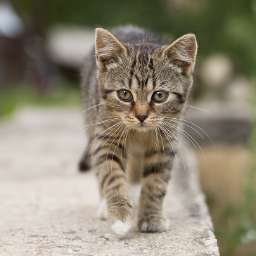

{ file: https://i2.pickpik.com/photos/395/172/1018/cat-tabby-outdoors-animals-preview.jpg, 
  top_eff: Seq<{str,r4}>
       0) { Label: tiger cat, Score: 0.62346196 }
       1) { Label: tabby cat, Score: 0.37370044 }
       2) { Label: Egyptian Mau, Score: 0.0027988816 }
       3) { Label: lens cap, Score: 2.6632094E-06 }
       4) { Label: lynx, Score: 1.7377116E-06 }
  top_res: Seq<{str,r4}>
       0) { Label: tabby cat, Score: 0.7346813 }
       1) { Label: tiger cat, Score: 0.22374676 }
       2) { Label: Egyptian Mau, Score: 0.029687107 }
       3) { Label: tiger, Score: 0.004514389 }
       4) { Label: radiator, Score: 0.00069551123 }
}



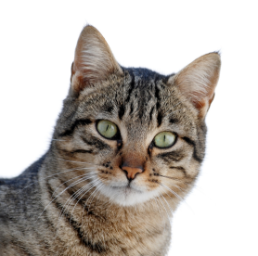

{ file: https://upload.wikimedia.org/wikipedia/commons/d/d4/Cat_March_2010-1a.jpg, 
  top_eff: Seq<{str,r4}>
       0) { Label: Egyptian Mau, Score: 0.9879242 }
       1) { Label: tabby cat, Score: 0.008009592 }
       2) { Label: tiger cat, Score: 0.004022313 }
       3) { Label: lynx, Score: 1.5256134E-05 }
       4) { Label: pot pie, Score: 9.21726E-07 }
  top_res: Seq<{str,r4}>
       0) { Label: Egyptian Mau, Score: 0.52580315 }
       1) { Label: tabby cat, Score: 0.3543449 }
       2) { Label: tiger cat, Score: 0.10692716 }
       3) { Label: lynx, Score: 0.0022343437 }
       4) { Label: radiator, Score: 0.0008849123 }
}


In [18]:
// Create a tensor so we can easily get the length and index into it.
pairs := ForEach(res: results, img: images, { img, res })->Tensor.From();

idx := 0;
while (idx < pairs.Shape[0]) {
    pair := pairs[idx];
    idx := idx + 1;

    // Show the image.
    pair.img->Show();

    // Show the results record.
    pair.res;
}